# Covid-19 API 
* Data source: 
** htt
** htt
## Objective:
* use requests to get json Data
* use pandas.json_normalize to access nested json object

* ຂຽນໂດຍ: ສັງຄົມ ແສງສຸລິຈັນ (Sangkhom sengsoulichanh)
* MT. EUT.edu.vn
* IDL from Laos

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('x_c8DQQYyh0', width= 702, height= 405)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f'pandas   version: {pd.__version__}')
print(f'seaborn  version: {sns.__version__}')
print(f'requests version: {requests.__version__}')

In [ ]:
pd.Timestamp.now()

In [ ]:
url='https://corona.lmao.ninja/v2/jhucsse'
r=requests.get(url)
j=r.json()
j[:3] # ໃຫ້ສະແດງ3ປະເທດທຳອິດ

In [ ]:
type(j)

In [ ]:
df=pd.DataFrame(j)
df

### split stats (dictionary columns) into separate columns:ແຍກເອົາແຕ່ຄໍລ້ຳ stats

In [ ]:
#dstats=df['stats'].apply(pd.Series)
dstats = pd.json_normalize(df.stats)
dstats

In [ ]:
#dcoor=df['coordinate'].apply(pd.Series)
dcoor = pd.json_normalize(df.coordinates)
dcoor


In [ ]:
df

In [ ]:
df.columns

### Created final dataframe

In [ ]:
ds=pd.concat([df[['country', 'province', 'updatedAt']], dstats, dcoor], axis=1)
ds

In [ ]:
ds.info()

In [ ]:
ds['updatedAt']=ds['updatedAt'].astype('datetime64')

In [ ]:
ds.columns

In [ ]:
ds.info()

In [ ]:
ds.confirmed.sum()

In [ ]:
ds[ds['country']=='Laos']

In [ ]:
ds[['confirmed','deaths','recovered']].sum()

In [ ]:
ds[['country', 'confirmed', 'deaths', 'recovered']].groupby('country').sum()

In [ ]:
dq=ds[ds['country'].str.contains('Thailand|Malaysia|Singapore|Vietnam|Laos')]
dq

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=dq, x='country', y='confirmed', color='.8')

In [43]:
colors=['.8' if c != 'Vietnam' else 'salmon' for c in dq['country']]
colors

['.8', '.8', '.8', '.8', 'salmon']

In [ ]:
str(ds.loc[0, 'updatedAt'])

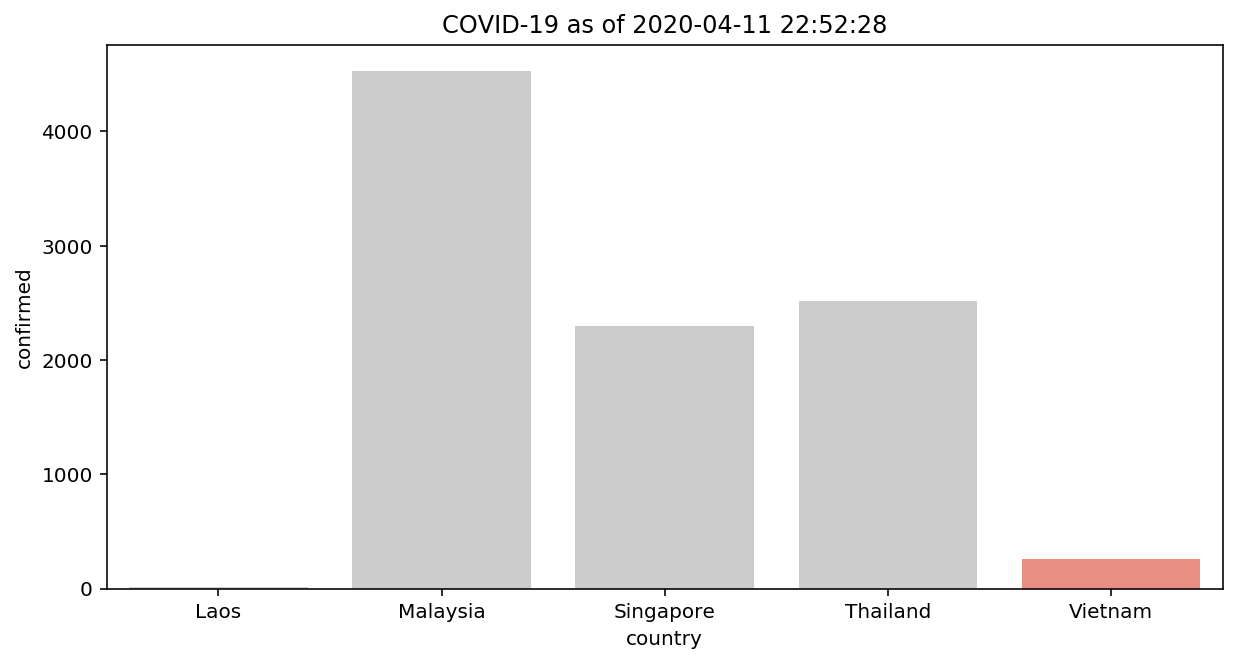

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dq, x='country', y='confirmed', palette=colors)
plt.title(f"COVID-19 as of {str(ds.loc[0, 'updatedAt'])}");

### ລອງໃຊ້ ເສັ້ນສະແດງສະນິດເສັ້ນຊື່

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=dq, x='country', y='confirmed', color='.8')